In [2]:
import datetime as dt
import matplotlib.dates as mdates
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [179]:
startt=UTCDateTime("2018-08-01T00:00:00.000Z")
endt=UTCDateTime("2018-08-30T23:59:59.000Z")
startt=startt.timestamp
endt=endt.timestamp

In [7]:
import requests

resp = requests.get('https://service.iris.edu/mustang/noise-psd/1/query?target=TA.E22K.*.BHZ.M&starttime=2018-08-01&endtime=2018-08-31&format=xml')
with open('pdf_test2.xml', 'w') as foutput:
   foutput.write(resp.content.decode('utf-8'))

In [37]:
xml1_file="pdf_test2.xml"
test2 = pd.read_xml(xml1_file, xpath="/PsdRoot/Psds/Psd")
print(test2)
xml1_file = "pdf_test2.xml"
test3 = pd.read_xml(xml1_file, xpath="/PsdRoot/Psds/Psd/value")
test3

              target                     start                       end  \
0     TA.E22K..BHZ.M  2018-08-01T00:00:00.000Z  2018-08-01T01:00:00.000Z   
1     TA.E22K..BHZ.M  2018-08-01T00:30:00.000Z  2018-08-01T01:30:00.000Z   
2     TA.E22K..BHZ.M  2018-08-01T01:00:00.000Z  2018-08-01T02:00:00.000Z   
3     TA.E22K..BHZ.M  2018-08-01T01:30:00.000Z  2018-08-01T02:30:00.000Z   
4     TA.E22K..BHZ.M  2018-08-01T02:00:00.000Z  2018-08-01T03:00:00.000Z   
...              ...                       ...                       ...   
1405  TA.E22K..BHZ.M  2018-08-30T21:00:00.000Z  2018-08-30T22:00:00.000Z   
1406  TA.E22K..BHZ.M  2018-08-30T21:30:00.000Z  2018-08-30T22:30:00.000Z   
1407  TA.E22K..BHZ.M  2018-08-30T22:00:00.000Z  2018-08-30T23:00:00.000Z   
1408  TA.E22K..BHZ.M  2018-08-30T22:30:00.000Z  2018-08-30T23:30:00.000Z   
1409  TA.E22K..BHZ.M  2018-08-30T23:00:00.000Z  2018-08-30T23:59:59.000Z   

      value  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...

,freq,power
0,0.005256,-172.838533
1,0.005731,-173.352568
2,0.006250,-174.386616
3,0.006816,-174.724578
4,0.007433,-174.987648
...,...,...
135355,13.958500,-148.449962
135356,15.221900,-148.185070
135357,16.599500,-143.510461
135358,18.101900,-127.188989


In [96]:
ma=np.zeros((96,1410))
c=0
r=-1
for i in range (0,135360):
    if ((r+1)/96) == 1:
        r =0
        c+=1
    else :
        r+=1
    ma[r,c]=test3.iloc[i,1]

    

In [128]:
final=np.zeros((96,706))
c=0
r=0
j=0
for i in range (0,67680):
    final[r,c]=ma[r,j]
    if ((r+1)/96) == 1:
        r =0
        c+=1
        j+=2
    else :
        r+=1
for i in range (0,96):
    final[i,705]=ma[i,1409]

In [132]:
print(final)

[[-172.83853302 -172.13403302 -173.14463302 ..., -178.55283302
  -174.52783302 -174.72283302]
 [-173.35256785 -172.64806785 -173.65866785 ..., -179.06686785
  -175.04186785 -175.23686785]
 [-174.38661583 -174.13751583 -174.69181583 ..., -180.31541583
  -176.17211583 -176.25761583]
 ..., 
 [-144.06016079 -143.91316079 -143.99476079 ..., -144.07286079
  -136.51037079 -143.51046079]
 [-127.62408913 -127.54328913 -127.61328913 ..., -127.66898913
  -121.24579913 -127.18898913]
 [ -76.16950702  -76.11210702  -76.17080702 ...,  -76.15930702
   -71.24190702  -75.95130702]]


In [134]:
final.shape

(96, 706)

In [241]:
time=np.arange(startt,endt,86400*7)
print(startt)
print(endt)
time.shape
utc=[]
for ele in time:
    k=(UTCDateTime(ele))
    utc.append(k.strftime("%Y-%m-%d"))

    
print(utc)

1533081600.0
1535673599.0
['2018-08-01', '2018-08-08', '2018-08-15', '2018-08-22', '2018-08-29']


In [247]:
final.shape

(96, 706)

In [249]:
time=np.arange(startt,endt,86400*7)

time.shape

(5,)

/tmp/ipykernel_32501/2758030238.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(utc)


[Text(0.0, 0, '2018-08-01'),
 Text(100.0, 0, '2018-08-08'),
 Text(200.0, 0, '2018-08-15'),
 Text(300.0, 0, '2018-08-22'),
 Text(400.0, 0, '2018-08-29'),
 Text(500.0, 0, ''),
 Text(600.0, 0, ''),
 Text(700.0, 0, ''),
 Text(800.0, 0, '')]

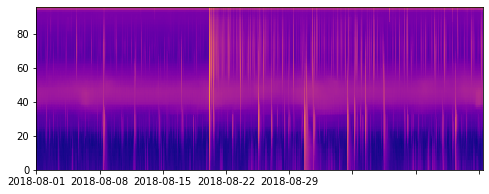

In [246]:
fig, ax = plt.subplots()
c = ax.pcolormesh(final, cmap='plasma')
fig.set_figwidth(8)
fig.set_figheight(3)
ax.set_xticklabels(utc)



In [251]:
data = np.array([[1, 2, 3], [4, 5, 6], [3, 2, 1]])

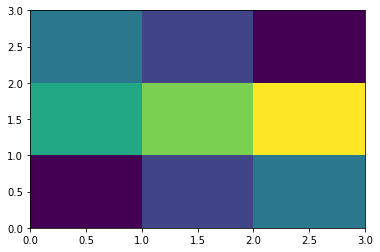

In [254]:
plt.pcolormesh(data)

In [264]:
time = np.array([t, t + 60, t + 120, t + 180])

In [268]:
time_mpl = [t.matplotlib_date for t in time]

In [270]:
time_mpl

[18859.064271082629,
 18859.064965527072,
 18859.065659971515,
 18859.066354415962]

AttributeError: 'AxesSubplot' object has no attribute 'fmt_xdate'

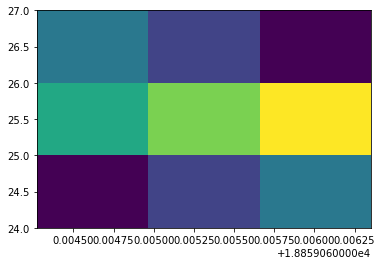

In [274]:
t = np.array([44, 45, 46, 47])
f = np.array([24, 25, 26, 27])

plt.pcolormesh(time_mpl, f, data)
plt.gca().fmt_xdate()


In [175]:
startt=UTCDateTime("2018-08-01T00:00:00.000Z")
endt=UTCDateTime("2018-08-30T23:59:59.000Z")
startt=startt.datetime
endt=dt.datetime
startt=mdates.date2num(startt)
endt=mdates.date2num(endt)

TypeError: descriptor 'astimezone' for 'datetime.datetime' objects doesn't apply to a 'datetime.timezone' object